## Exploratory Data Analysis on Spotify 2023 Dataset

### This exploratory data analysis on Most Streamed Spotify Songs 2023 aims to analyze, visualize, and interpret the data to extract meaningful insights.

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
# Load the data
spotify_data = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
spotify_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### Overview of Dataset

#### • How many rows and columns does the dataset contain?

In [217]:
print(f"Rows: {spotify_data.shape[0]} \nColumns: {spotify_data.shape[1]}")

Rows: 953 
Columns: 24


#### • What are the data types of each column? 

In [219]:
# Display general info
spotify_data.info()

#data type for each column can be seen on the column "Dtype"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

#### • Are there any missing values?

In [221]:
# Checking for missing values
missing_data = spotify_data.isnull().sum()
missing_data = missing_data[missing_data > 0].reset_index()
missing_data.columns = ['Column', 'Missing Count']
missing_data

,Column,Missing Count
0,in_shazam_charts,50
1,key,95


### Basic Descriptive Statistics

#### • What are the mean, median, and standard deviation of the streams column?

In [223]:
# Convert 'streams' column to numeric, handling commas and non-numeric entries
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'].astype(str).str.replace(',', ''), errors='coerce')

# Calculate mean, median, and standard deviation for 'streams'
stream_mean = spotify_data['streams'].mean()
stream_median = spotify_data['streams'].median()
stream_std_dev = spotify_data['streams'].std()

# Display statistics
stream_statistics = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev'],
    'Streams Value': [stream_mean, stream_median, stream_std_dev]
})
stream_statistics.style.format({"Streams Value": "{:.2f}"})

,Metric,Streams Value
0,Mean,514137424.94
1,Median,290530915.00
2,Std Dev,566856949.04


#### • What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

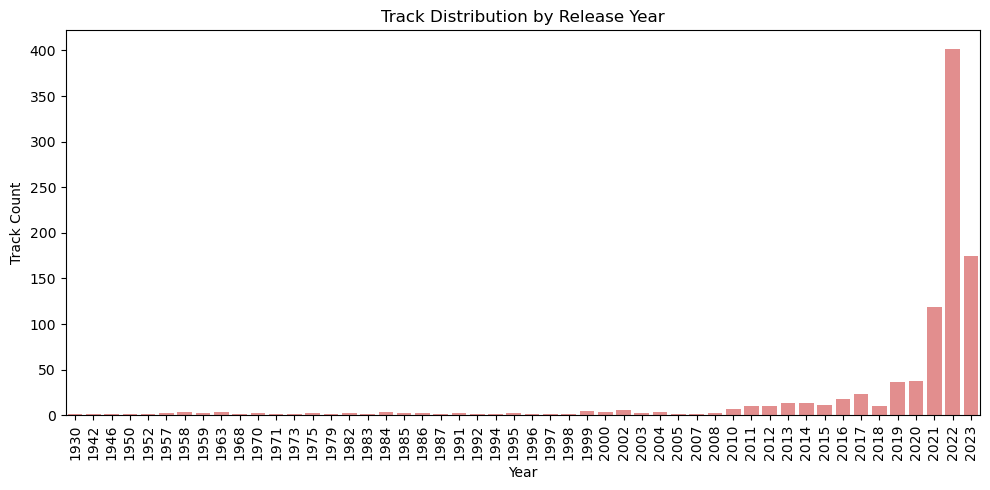

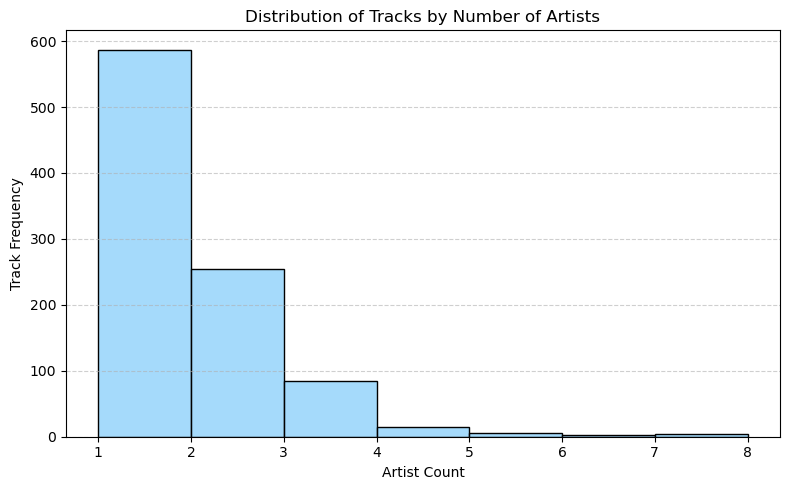

In [225]:
# Distribution of release years
year_distribution = spotify_data['released_year'].value_counts().sort_index()

# Plot distribution with rotated x-axis labels
plt.figure(figsize=(10, 5))
sns.barplot(x=year_distribution.index, y=year_distribution.values, color='lightcoral')
plt.title('Track Distribution by Release Year')
plt.xlabel('Year')
plt.ylabel('Track Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Artist count distribution plot
plt.figure(figsize=(8, 5))
sns.histplot(spotify_data['artist_count'], binwidth=1, color="lightskyblue", edgecolor="black")
plt.title("Distribution of Tracks by Number of Artists")
plt.xlabel("Artist Count")
plt.ylabel("Track Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Top Performers

#### • Which track has the highest number of streams? Display the top 5 most streamed tracks?

In [227]:
# Top 5 tracks by streams
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'].astype(str).str.replace(',', ''), errors='coerce')
top_5_tracks = spotify_data.sort_values(by='streams', ascending=False).head(5).reset_index(drop=True)
top_5_tracks

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


#### • Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [229]:
# Top 5 artists by track count
most_frequent_artists = spotify_data['artist(s)_name'].str.split(', ').explode().value_counts().head(5).reset_index()
most_frequent_artists.columns = ['Artist', 'Track Count']
most_frequent_artists


,Artist,Track Count
0,Bad Bunny,40
1,Taylor Swift,38
2,The Weeknd,37
3,SZA,23
4,Kendrick Lamar,23


### Temporal Trends

#### • Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

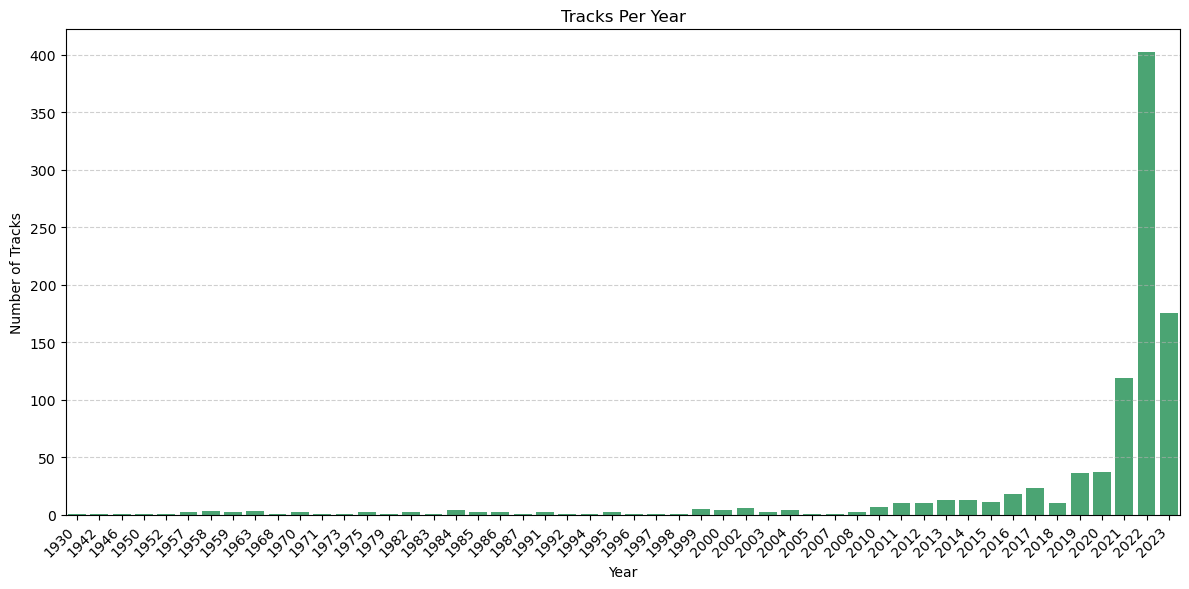

In [233]:
# Yearly track release trend
spotify_data['released_year'] = pd.to_numeric(spotify_data['released_year'], errors='coerce')
tracks_by_year = spotify_data['released_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=tracks_by_year.index, y=tracks_by_year.values, color='mediumseagreen')
plt.title('Tracks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### • Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

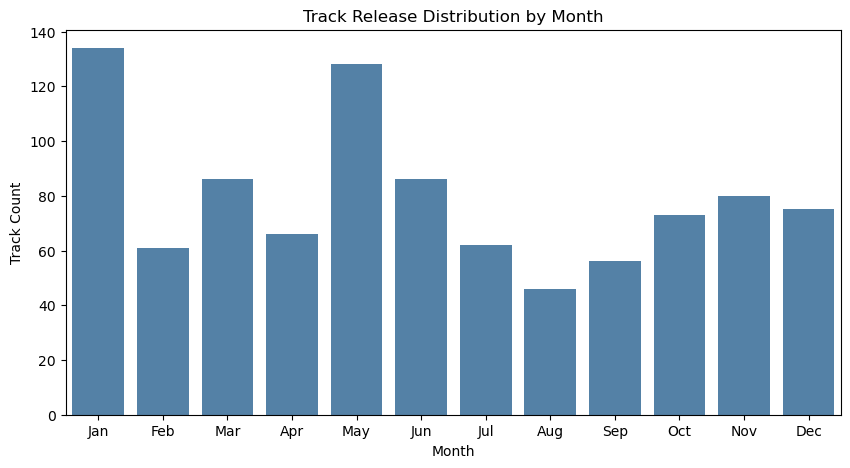

In [235]:
# Track releases by month
spotify_data['released_month'] = pd.to_numeric(spotify_data['released_month'], errors='coerce')
tracks_by_month = spotify_data['released_month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=range(1, 13), y=tracks_by_month, color='steelblue')
plt.title('Track Release Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Track Count')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Genre and Music Characteristics

#### • Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

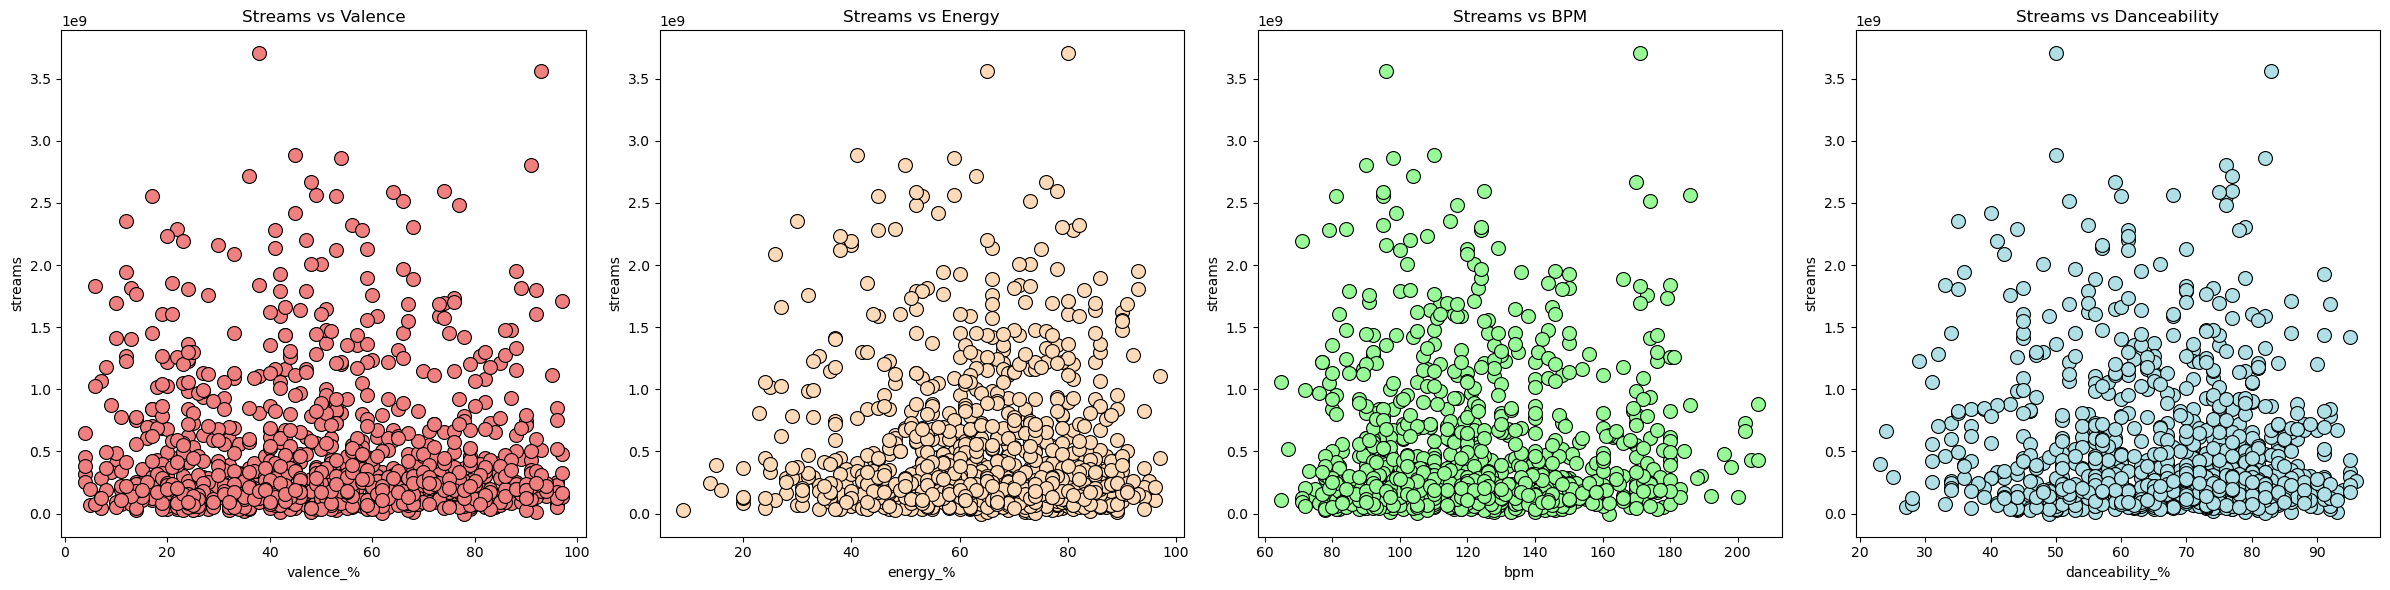

In [261]:
# Scatter plots for 'streams' vs. attributes
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
scatter_params = {'s': 100, 'edgecolor': 'black'}

sns.scatterplot(ax=axes[3], x='danceability_%', y='streams', data=spotify_data, color='powderblue', **scatter_params)
axes[3].set_title("Streams vs Danceability")

sns.scatterplot(ax=axes[2], x='bpm', y='streams', data=spotify_data, color='palegreen', **scatter_params)
axes[2].set_title("Streams vs BPM")

sns.scatterplot(ax=axes[1], x='energy_%', y='streams', data=spotify_data, color='peachpuff', **scatter_params)
axes[1].set_title("Streams vs Energy")

sns.scatterplot(ax=axes[0], x='valence_%', y='streams', data=spotify_data, color='lightcoral', **scatter_params)
axes[0].set_title("Streams vs Valence")

plt.tight_layout()
plt.show()

#### • Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

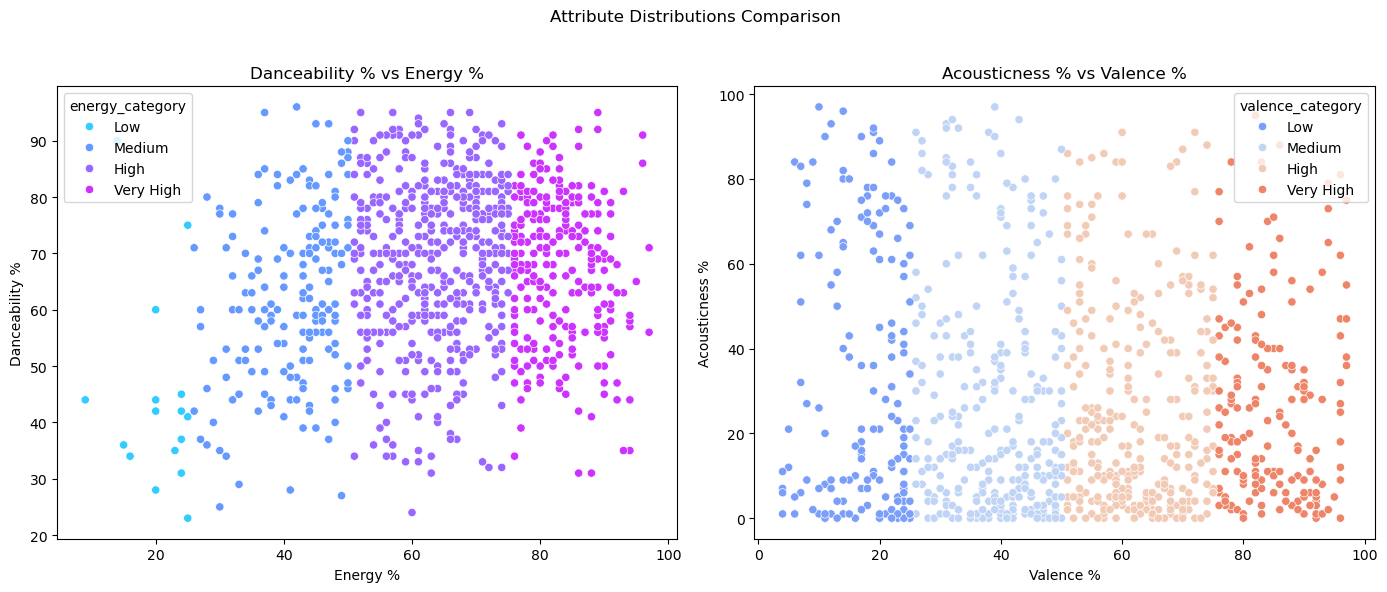

In [257]:
# Categorizing valence into different levels
spotify_data['valence_category'] = pd.cut(spotify_data['valence_%'], bins=[0, 25, 50, 75, 100], labels=['Low', 'Medium', 'High', 'Very High'])

# Categorizing energy into different levels
spotify_data['energy_category'] = pd.cut(spotify_data['energy_%'], bins=[0, 25, 50, 75, 100], labels=['Low', 'Medium', 'High', 'Very High'])

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Attribute Distributions Comparison')

# Scatter plot of Danceability % by Energy %
sns.scatterplot(x='energy_%', y='danceability_%', data=spotify_data, hue='energy_category', palette="cool", ax=axes[0])
axes[0].set_title('Danceability % vs Energy %')
axes[0].set_ylabel('Danceability %')
axes[0].set_xlabel('Energy %')

# Scatter plot of Acousticness % by Valence %
sns.scatterplot(x='valence_%', y='acousticness_%', data=spotify_data, hue='valence_category', palette="coolwarm", ax=axes[1])
axes[1].set_title('Acousticness % vs Valence %')
axes[1].set_ylabel('Acousticness %')
axes[1].set_xlabel('Valence %')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Platform Popularity

#### • How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

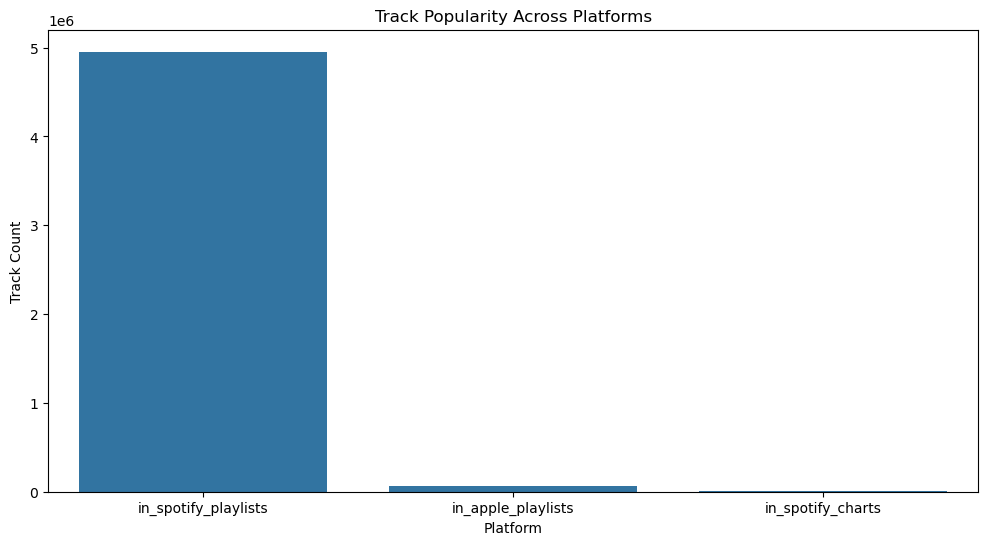

In [249]:
# Artist statistics in playlists and charts
platform_cols = ['in_spotify_playlists', 'in_apple_playlists', 'in_spotify_charts']
spotify_data[platform_cols] = spotify_data[platform_cols].apply(pd.to_numeric, errors='coerce')
platform_counts = spotify_data[platform_cols].sum().reset_index()
platform_counts.columns = ['Platform', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=platform_counts, x='Platform', y='Count')
plt.title('Track Popularity Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Track Count')
plt.show()

### Advanced Analysis

#### • Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

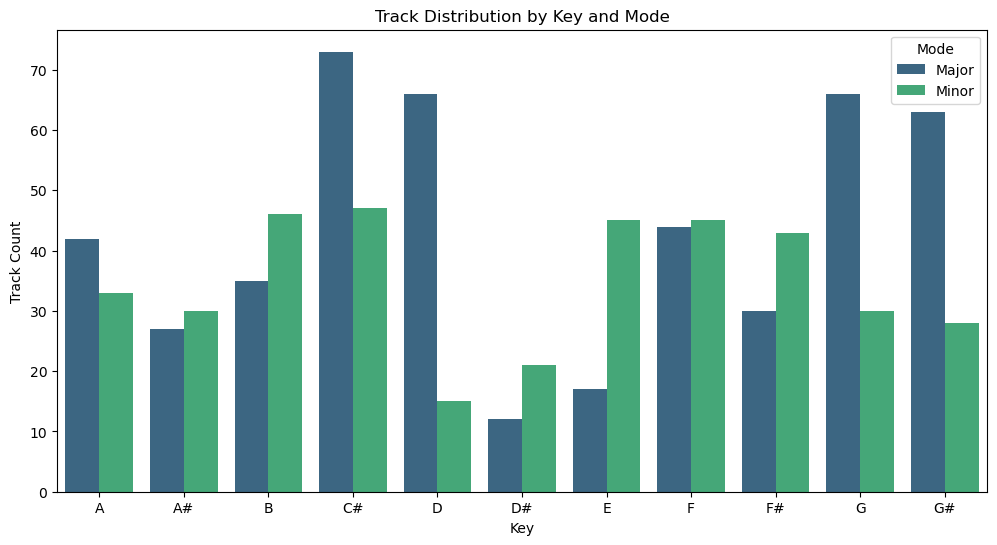

In [251]:
# Distribution by key and mode
key_mode_data = spotify_data.groupby(['key', 'mode']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=key_mode_data, x='key', y='Count', hue='mode', palette='viridis')
plt.title('Track Distribution by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Track Count')
plt.legend(title='Mode')
plt.show()

#### • Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.


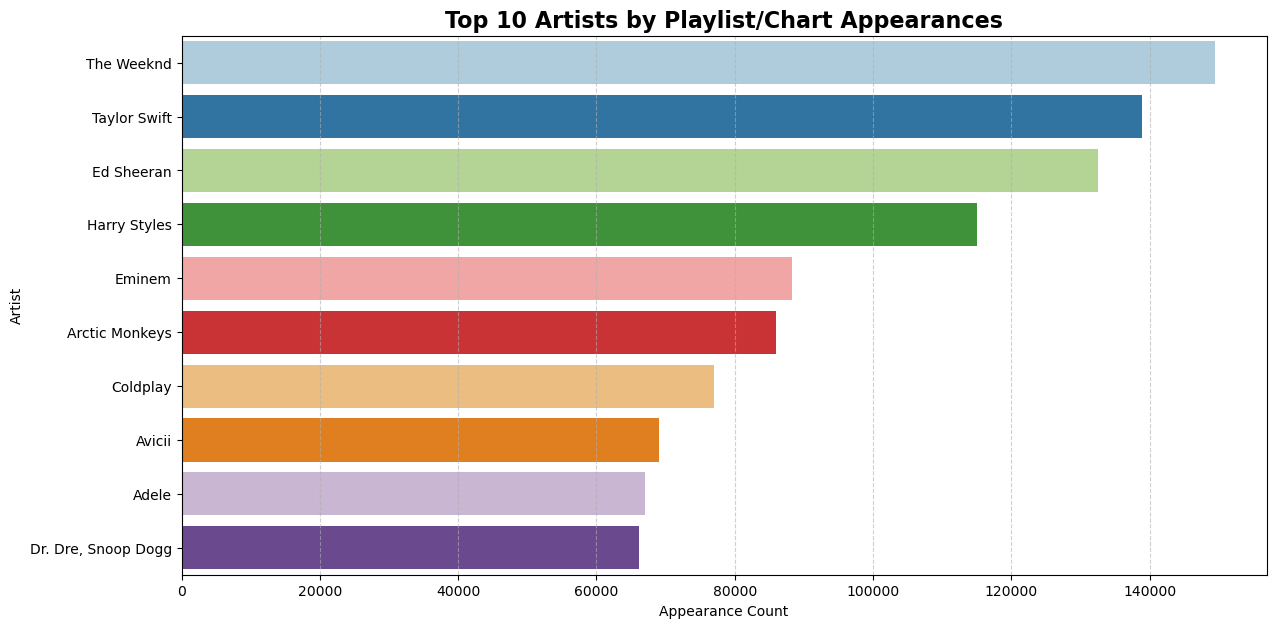

In [259]:
# List of platforms/columns that represent the presence of artists in various playlists and charts
platforms_list = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts']

# Ensure the columns are numeric, coerce errors into NaN (useful if they contain non-numeric values)
spotify_data[platforms_list] = spotify_data[platforms_list].apply(pd.to_numeric, errors='coerce')

# Group by artist(s) and sum the appearances across the platforms
artist_appearance = spotify_data.groupby("artist(s)_name")[platforms_list].sum().sum(axis=1).sort_values(ascending=False)

# Get the top 10 artists
top_10_artists = artist_appearance.head(10).reset_index()
top_10_artists.columns = ['Artist', 'Appearance Count']

# Plot the top 10 artists by appearance count
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_artists, x='Appearance Count', y='Artist', palette="Paired", hue='Artist')  # Explicitly add 'hue'
plt.title('Top 10 Artists by Playlist/Chart Appearances', fontsize=16, fontweight='bold')
plt.xlabel('Appearance Count')
plt.ylabel('Artist')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()